In [10]:
import solvers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def Runge_Kutta(fun, interval, x_0, h, act_fctn=lambda x,t:x):
    x_i = x_0
    t_i = interval[0]
    its =  int(np.abs(interval[0] - interval[1]) / np.abs(h))
    sol = [x_0]

    for _ in range(its - 1):

        F1 = h*fun(t_i, x_i)
        F2 = h*fun(t_i + h/2, x_i + F1/2)
        F3 = h*fun(t_i + h/2, x_i + F2/2)
        F4 = h*fun(t_i + h, x_i + F3)
        x_i += (F1 + 2*F2 + 2*F3 + F4)/6
        t_i += h
        sol.append(act_fctn(x_i, t_i))
    return sol

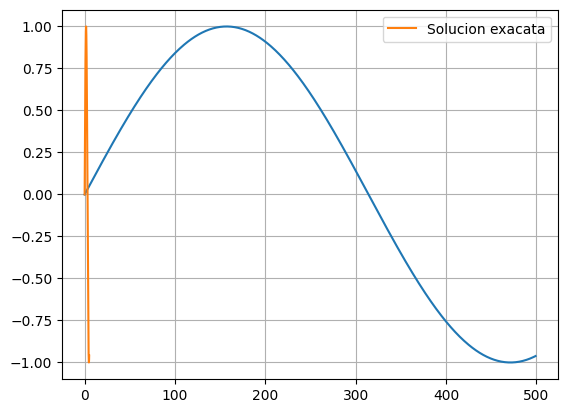

In [13]:
p=1

fun = lambda t,x: p*x + np.cos(t) - p*np.sin(t)

exact = lambda t: p*np.sin(t)

fig, ax = plt.subplots(1,1)
x = np.linspace(0,5,500)
ax.plot(Runge_Kutta(fun, [0,5], 0, 0.01))

ax.plot(x, exact(x), label='Solucion exacata')
ax.grid()
ax.legend()
plt.show()

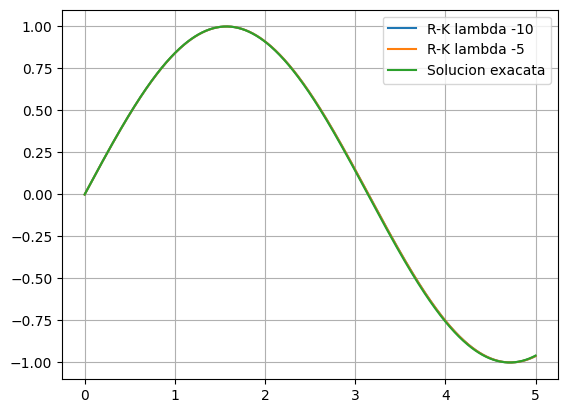

In [7]:
def Runge_Kutta(fun, interval, x_0, h, p):
    x_i = x_0
    t_i = interval[0]
    its =  int(np.abs(interval[0] - interval[1]) / np.abs(h))
    sol = [x_0]

    for _ in range(its - 1):

        F1 = h*fun(p, t_i, x_i)
        F2 = h*fun(p, t_i + h/2, x_i + F1/2)
        F3 = h*fun(p, t_i + h/2, x_i + F2/2)
        F4 = h*fun(p, t_i + h, x_i + F3)
        x_i += (F1 + 2*F2 + 2*F3 + F4)/6
        t_i += h
        sol.append(x_i)
    return sol

fun = lambda p,t,x: p*x + np.cos(t) - p*np.sin(t)

exact = lambda t, p: np.sin(t)

lambdas = [-10, -5]
fig, ax = plt.subplots(1,1)
x = np.linspace(0,5,500)
for i in lambdas:
    RK = Runge_Kutta(fun, [0,5], 0, 0.01, i)
    ax.plot(x, RK, label=f'R-K lambda {i}')
ax.plot(x, exact(x,i), label='Solucion exacata')
ax.grid()
ax.legend()
plt.show()